# Titanic Dataset Review
**Author:** Gabriel Richards (gjrich)

**Date:** 1 Apr 2025

**Objective:** This notebook is a review of the Titanic dataset to look at the passengers of the famous ship that struck an iceberg and sunk. At the end we conduct a test-train-split to prepare the dataset for Machine Learning in later modules.


## 1 Imports and Basic Review
In the code cell below, we import the necessary Python libraries for this notebook.  

In [1]:
# all imports get moved to the top

import seaborn as sns
import pandas as pd

from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.model_selection import StratifiedShuffleSplit


In [2]:
# Load Titanic dataset
titanic = sns.load_dataset('titanic')

Display basic information about the dataset using the info() method.

In [3]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


Display the first 10 rows.  If not the last statement in a Python cell, you'll have to wrap in the print() function to display. 



In [4]:
print(titanic.head(10))


   survived  pclass     sex   age  sibsp  parch     fare embarked   class  \
0         0       3    male  22.0      1      0   7.2500        S   Third   
1         1       1  female  38.0      1      0  71.2833        C   First   
2         1       3  female  26.0      0      0   7.9250        S   Third   
3         1       1  female  35.0      1      0  53.1000        S   First   
4         0       3    male  35.0      0      0   8.0500        S   Third   
5         0       3    male   NaN      0      0   8.4583        Q   Third   
6         0       1    male  54.0      0      0  51.8625        S   First   
7         0       3    male   2.0      3      1  21.0750        S   Third   
8         1       3  female  27.0      0      2  11.1333        S   Third   
9         1       2  female  14.0      1      0  30.0708        C  Second   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes

Check for missing values using the isnull() method and then the sum() method. 

In [5]:
titanic.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Display summary statistics using the describe() method

In [6]:
print(titanic.describe())


         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


Check for correlations using the corr() method and tell it to use only the numeric features. 



In [7]:
print(titanic.corr(numeric_only=True))


            survived    pclass       age     sibsp     parch      fare  \
survived    1.000000 -0.338481 -0.077221 -0.035322  0.081629  0.257307   
pclass     -0.338481  1.000000 -0.369226  0.083081  0.018443 -0.549500   
age        -0.077221 -0.369226  1.000000 -0.308247 -0.189119  0.096067   
sibsp      -0.035322  0.083081 -0.308247  1.000000  0.414838  0.159651   
parch       0.081629  0.018443 -0.189119  0.414838  1.000000  0.216225   
fare        0.257307 -0.549500  0.096067  0.159651  0.216225  1.000000   
adult_male -0.557080  0.094035  0.280328 -0.253586 -0.349943 -0.182024   
alone      -0.203367  0.135207  0.198270 -0.584471 -0.583398 -0.271832   

            adult_male     alone  
survived     -0.557080 -0.203367  
pclass        0.094035  0.135207  
age           0.280328  0.198270  
sibsp        -0.253586 -0.584471  
parch        -0.349943 -0.583398  
fare         -0.182024 -0.271832  
adult_male    1.000000  0.404744  
alone         0.404744  1.000000  


### Reflection 1
1) How many data instances are there?   There are 891 data instances (rows)
2) How many features are there?   There are 15 features (columns)
3) What are the names?   survived, pclass, sex, age, sibsp, parch, fare, embarked, class, who, adult_male, deck, embark_town, alive, and alone
4) Are there any missing values?   Yes, there are missing values:

    age: 177 missing values; 
    deck: 688 missing values; 
    embarked: 2 missing values;  
    embark_town: 2 missing values

5) Are there any non-numeric features?   Yes, there are non-numeric features. Image 2 shows these data types:
    object (5): sex, embarked, who, embark_town, alive;  
    category (2): class, deck;  
    bool (2): adult_male, alone

6) Are the data instances sorted on any of the attributes?   No, the data instances don't appear to be sorted on any particular attribute based on the first 10 rows
7) What are the units of age? Years
8) What are the minimum, median and max age? 
    Minimum age: 0.42 years;  
    Median age: 28.0 years;  
    Maximum age: 80.0 years

9)  What two different features have the highest correlation?   The highest correlation is between "alone" and "sibsp" at -0.584471, followed closely by "alone" and "parch" at -0.583398.

10) Are there any categorical features that might be useful for prediction?   Several!

adult_male (correlation with survived: -0.557080);  
pclass (-0.338481);  
class (categorical version of pclass);  
embark_town (potential socioeconomic indicator)

## Section 2. Data Exploration and Preparation

### 2.1 Explore Data Patterns and Distributions
Since Titanic contains both numeric and categorical variables, we'll use only numeric values here.

Create a scatter plot of age vs fare, colored by gender:

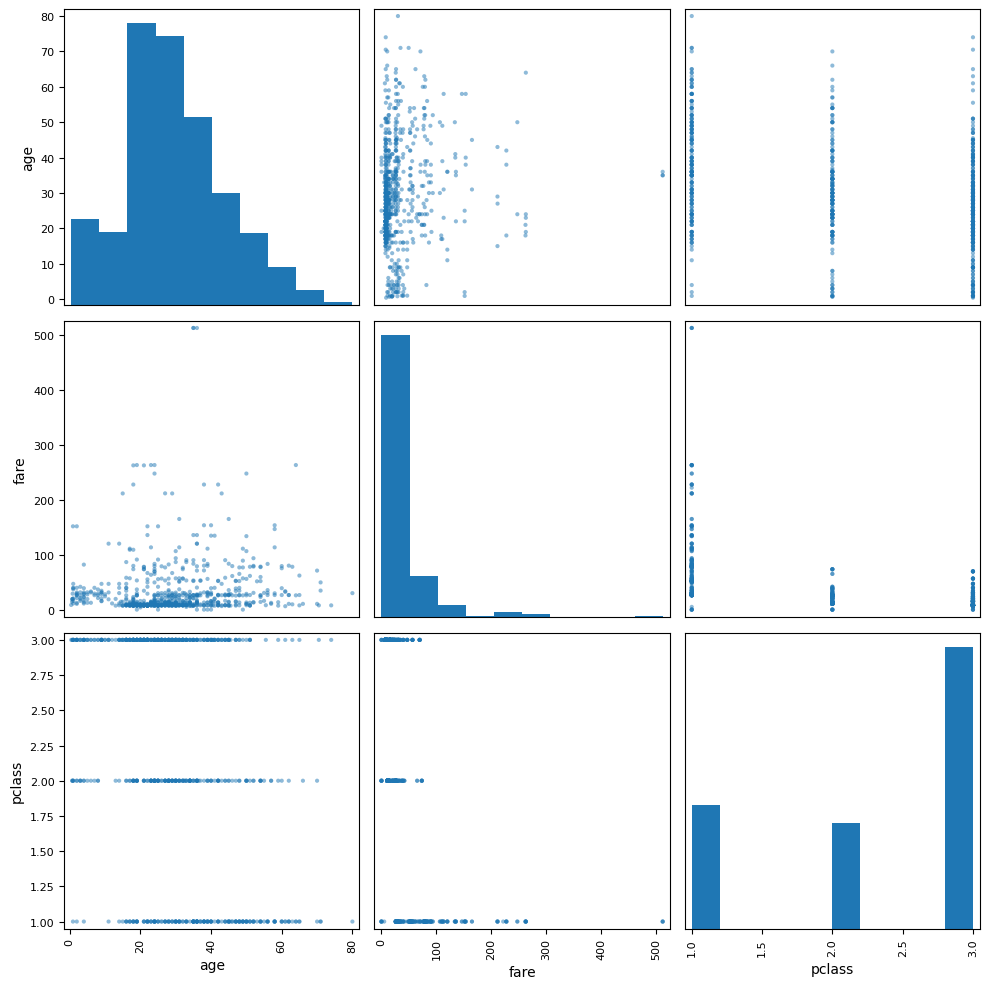

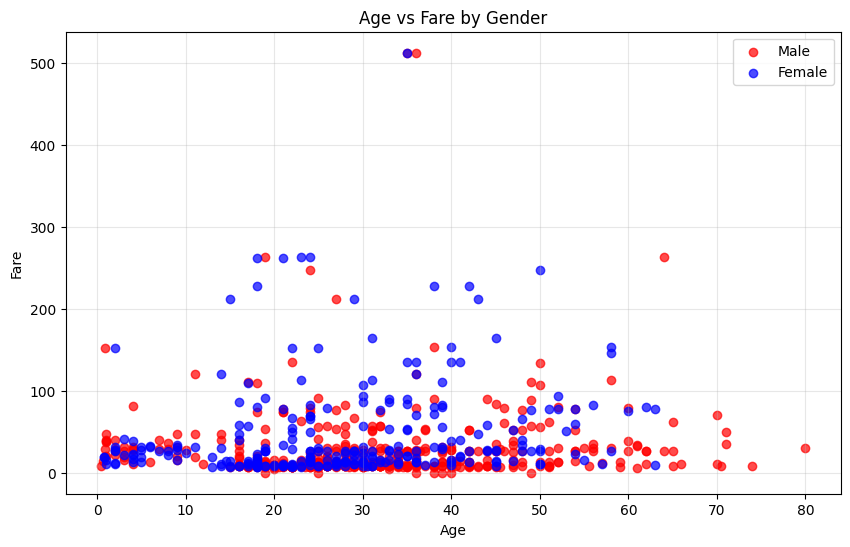

In [8]:
# First visualization - Scatter matrix
attributes = ['age', 'fare', 'pclass']
scatter_matrix(titanic[attributes], figsize=(10, 10))
plt.tight_layout()
plt.show()



plt.figure(figsize=(10, 6))

# Create scatter plots for each gender separately
males = titanic[titanic['sex'] == 'male']
females = titanic[titanic['sex'] == 'female']

# Plot males in red, females in blue
plt.scatter(males['age'], males['fare'], color='red', alpha=0.7, label='Male')
plt.scatter(females['age'], females['fare'], color='blue', alpha=0.7, label='Female')

plt.xlabel('Age')
plt.ylabel('Fare')
plt.title('Age vs Fare by Gender')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

### Histogram of age

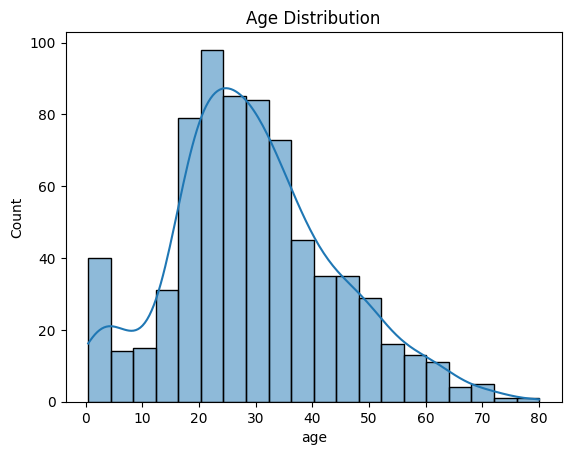

In [9]:
sns.histplot(titanic['age'], kde=True)
plt.title('Age Distribution')
plt.show()

### Count plot for class and survival

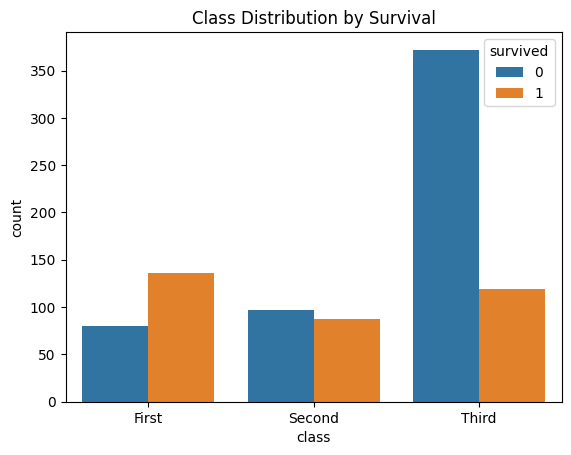

In [10]:
sns.countplot(x='class', hue='survived', data=titanic)
plt.title('Class Distribution by Survival')
plt.show()

### 2.2 Reflections

#### What patterns or anomalies do you notice?
Age is bimodally distributed with peaks around 25-30 years and at very young ages (<5 years)
Fare distribution is heavily right-skewed with most passengers paying <50 but some extreme outliers over 500
Clear differences in survival rates across passenger classes
Gender strongly correlates with survival 
There is a high concentration of passengers in third class


#### Do any features stand out as potential predictors?
Passenger class (pclass) shows dramatic survival differences - first class had highest survival rate while third class had lowest
Gender appears significant with females (yellow dots) having higher survival rates across all classes
Fare correlates with survival (likely as a proxy for class)
The combination of gender and class appears particularly predictive.



#### Are there any visible class imbalances?
Survival status is imbalanced (~38% survived, 62% perished)
Passenger classes are heavily imbalanced with most passengers in third class
Age has 177 missing values (19.9% of dataset)
Deck information is missing for 688 passengers (77.2%)
Significant gender imbalance with more males than females

### 2.3 Handle Missing Values and Clean Data

Age was missing values. We can impute missing values for age using the median:

In [11]:
titanic['age'] = titanic['age'].fillna(titanic['age'].median())


Embark_town was missing values. We can drop missing values for embark_town (or fill with mode):

In [12]:
titanic['embark_town'] = titanic['embark_town'].fillna(titanic['embark_town'].mode())


### 2.4 Feature Engineering

Create a new feature: Family size

In [13]:
titanic['family_size'] = titanic['sibsp'] + titanic['parch'] + 1



Convert categorical data to numeric:



In [14]:
titanic['sex'] = titanic['sex'].map({'male': 0, 'female': 1})
titanic['embarked'] = titanic['embarked'].map({'C': 0, 'Q': 1, 'S': 2})

Create a binary feature for 'alone':



In [15]:
titanic['alone'] = titanic['alone'].astype(int)


### 2.5 Further Reflections

#### Why might family size be a useful feature for predicting survival?
- Family dynamics affected survival decisions (staying together vs. individual escape)
- Different-sized groups had different mobility during evacuation [harder to move as a larger group]
- Large families might have been predominantly in certain classes/deck locations


#### Why convert categorical data to numeric?
- Machine learning algorithms require numeric input
- Mathematical operations can't be performed on text
- Numeric encoding enables pattern detection by algorithms
- It standardizes features for consistent processing in models

## Section 3. Feature Selection and Justification

### 3.1 Choose features and target

Select two or more input features (numerical for regression, numerical and/or categorical for classification)
Select a target variable (as applicable)
Classification: Categorical target variable (e.g., gender, species).
Justify your selection with reasoning.
 

For classification, we’ll use survived as the target variable.

Input features: age, fare, pclass, sex, family_size
Target: survived

### 3.2 Define X and y

Assign input features to X
Assign target variable to y (as applicable)

In [16]:
X = titanic[['age', 'fare', 'pclass', 'sex', 'family_size']]
y = titanic['survived'] 

### 3.2 Reflection

#### Why are these features selected?
- Sex: Women and children first policies were followed
- Pclass: Represents socioeconomic status and physical location on ship (lower decks had less access to lifeboats)
- Age: Children were prioritized for rescue
- Fare: Proxy for wealth/status that might influence treatment
- Family_size: Feature could capture group dynamics during evacuation

#### Are there any features that are likely to be highly predictive of survival?
- Sex: Strong correlation with survival (-0.557), with females having higher survival rates
- Pclass: Second strongest predictor (-0.338), with first-class passengers surviving at  higher rates
- Family_size: Related to "alone" status (-0.203 correlation), suggesting traveling with family affected survival chances

## Section 4. Splitting

Here, we split the data into Split the data into training and test sets using train_test_split first and StratifiedShuffleSplit second. 

With the Basic split, it is blindly taking rows (without any consideration to the data in them) and distributing them into two sets - 80% train and 20% test.

For the Stratified Split, it distributes the rows into a similar 80/20 split, but ensuring that each set has a similar distribution for pclass as the original distribution.



### 4.1 Basic Train/Test split 


In [17]:
X_train_basic, X_test_basic, y_train_basic, y_test_basic = train_test_split(X, y, test_size=0.2, random_state=123)

print('Train size:', len(X_train_basic))
print('Test size:', len(X_test_basic))

print('y Train size:', len(y_train_basic))
print('y Test size:', len(y_test_basic))

Train size: 712
Test size: 179
y Train size: 712
y Test size: 179


In [18]:
print("\nOriginal Pclass Distribution:")
print(X['pclass'].value_counts(normalize=True).sort_index())
print("Basic Train Set Pclass Distribution:")
print(X_train_basic['pclass'].value_counts(normalize=True).sort_index())
print("Basic Test Set Pclass Distribution:")
print(X_test_basic['pclass'].value_counts(normalize=True).sort_index())


Original Pclass Distribution:
pclass
1    0.242424
2    0.206510
3    0.551066
Name: proportion, dtype: float64
Basic Train Set Pclass Distribution:
pclass
1    0.233146
2    0.209270
3    0.557584
Name: proportion, dtype: float64
Basic Test Set Pclass Distribution:
pclass
1    0.279330
2    0.195531
3    0.525140
Name: proportion, dtype: float64


### 4.2 Stratified Train/Test split


In [19]:
splitter = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=123)

for train_indices, test_indices in splitter.split(X, y):
    X_train_strat = X.iloc[train_indices]
    X_test_strat = X.iloc[test_indices]
    y_train_strat = y.iloc[train_indices]
    y_test_strat = y.iloc[test_indices]

print('Train size:', len(X_train_strat))
print('Test size:', len(X_test_strat))

Train size: 712
Test size: 179


In [20]:
print("\nOriginal Pclass Distribution:")
print(X['pclass'].value_counts(normalize=True).sort_index())
print("Stratified Train Set Pclass Distribution:")
print(X_train_strat['pclass'].value_counts(normalize=True).sort_index())
print("Stratified Test Set Pclass Distribution:")
print(X_test_strat['pclass'].value_counts(normalize=True).sort_index())


Original Pclass Distribution:
pclass
1    0.242424
2    0.206510
3    0.551066
Name: proportion, dtype: float64
Stratified Train Set Pclass Distribution:
pclass
1    0.227528
2    0.210674
3    0.561798
Name: proportion, dtype: float64
Stratified Test Set Pclass Distribution:
pclass
1    0.301676
2    0.189944
3    0.508380
Name: proportion, dtype: float64


In [21]:
distributions = {
    'Original Distribution': X['pclass'].value_counts(normalize=True).sort_index(),
    'Basic Train': X_train_basic['pclass'].value_counts(normalize=True).sort_index(),
    'Basic Test': X_test_basic['pclass'].value_counts(normalize=True).sort_index(),
    'Stratified Train': X_train_strat['pclass'].value_counts(normalize=True).sort_index(),
    'Stratified Test': X_test_strat['pclass'].value_counts(normalize=True).sort_index()
}

df = pd.DataFrame(distributions)
df.style.format("{:.4f}")

,Original Distribution,Basic Train,Basic Test,Stratified Train,Stratified Test
pclass,,,,,
1,0.2424,0.2331,0.2793,0.2275,0.3017
2,0.2065,0.2093,0.1955,0.2107,0.1899
3,0.5511,0.5576,0.5251,0.5618,0.5084


### 4.3 Reflection

Why might stratification improve model performance?
- Stratification forces proportional representation of classes across train and test sets. By maintaining class distributions, models train on representative data and are evaluated fairly, reducing variance and improving generalization.

How close are the training and test distributions to the original dataset?

- Basic split: Basic split shows noticeable deviations (class 1: 24.2% → 27.9% in test)
  
- Stratified split: Stratified split shows larger deviations (class 1: 24.2% → 30.2% in test)

Which split method produced better class balance?
- The stratified split showed more deviation in the pclass than the basic split 
- This suggests that pclass and survived may have correlations that complicate maintaining both distributions simultaneously.